In [1]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

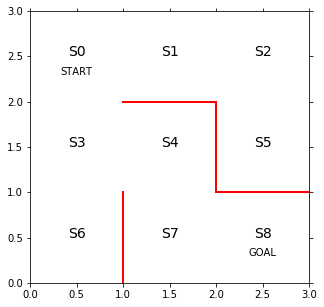

In [2]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)


# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])


# 方策パラメータthetaを行動方策piに変換する関数の定義


def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''

    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 割合の計算

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

# 初期の方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)


# 1step移動後の状態sを求める関数を定義


def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    # pi[s,:]の確率に従って、directionが選択される

    if next_direction == "up":
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return s_next


# 迷路内をエージェントがゴールするまで移動させる関数の定義


def goal_maze(pi):
    s = 0  # スタート地点
    state_history = [0]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  # 記録リストに次の状態（エージェントの位置）を追加

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return state_history


# 迷路内をゴールを目指して、移動
state_history = goal_maze(pi_0)

# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''背景画像の初期化'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''フレームごとの描画内容'''
    state = state_history[i]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成する
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

In [3]:
state_size = 3
ncol=4
nrow=10
q_nrow = nrow * state_size
q_ncol = ncol * state_size
reward_map = np.zeros((q_nrow, q_ncol))

# reward_map[0][0+1] = 0.3
reward_map[1][1] = 0.3
# reward_map[1][2] = -0.3

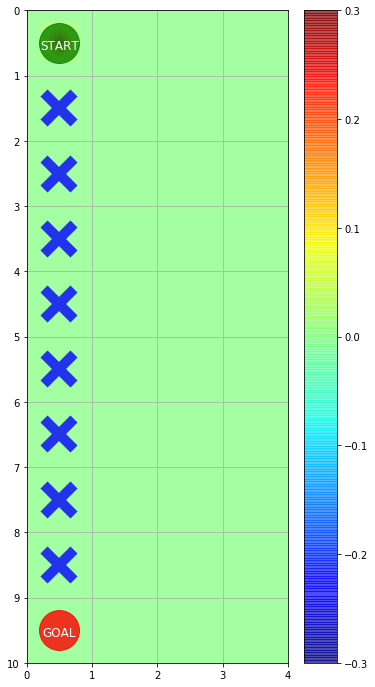

In [8]:
fig = plt.figure(figsize=(6,12))
ax = fig.add_subplot(1, 1, 1)
mappable0 = plt.imshow(reward_map, cmap=cm.jet, interpolation="bilinear",
           vmax=abs(reward_map).max(), vmin=-abs(reward_map).max(), alpha=0.7)
# ax.set_xlim(-0.5, q_ncol - 0.5)
# ax.set_ylim(-0.5, q_nrow - 0.5)
ax.set_xticks(np.arange(-0.5, q_ncol, state_size))
ax.set_yticks(np.arange(-0.5, q_nrow, state_size))
ax.set_xticklabels(range(ncol + 1))
ax.set_yticklabels(range(nrow + 1))
ax.grid(which="both")

# Snp.random.choice([0,1,2,3], size=1, p=prob_n)tart: green, Goal: blue, Hole: red
ax.plot([1], [1], marker="o", color='g', markersize=40, alpha=0.8)

ax.plot([1], [4], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)
ax.plot([1], [7], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)
ax.plot([1], [10], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)
ax.plot([1], [13], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)
ax.plot([1], [16], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)
ax.plot([1], [19], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)
ax.plot([1], [22], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)
ax.plot([1], [25], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)
ax.plot([1], [28], marker="o", color='r', markersize=40, alpha=0.8)
fig.colorbar(mappable0, ax=ax, orientation="vertical")

ax.text(1, 1.3, 'START', ha='center', size=12, c='w')
ax.text(1, 28.3, 'GOAL', ha='center', size=12, c='w')


plt.show()
# plt.savefig('image.png')

In [37]:
import seaborn as sns
reward_map = np.random.rand(q_nrow*q_ncol, 64, 4)

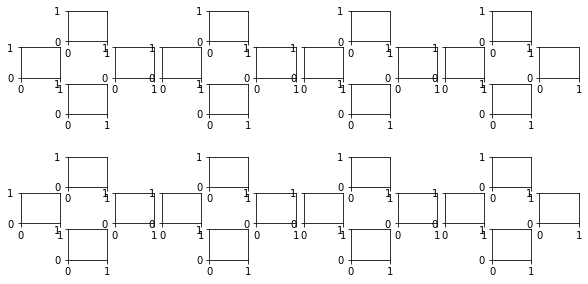

In [143]:
fig = plt.figure(figsize=(10, 20)) # figureオブジェクト作成

center_idx = q_ncol*1+2

# axesオブジェクト追加
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*0 - q_ncol)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*0 -1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*0 +1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*0 +q_ncol)

ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*1 - q_ncol)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*1 - 1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*1 + 1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*1 + q_ncol)

ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*2 - q_ncol)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*2 -1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*2 +1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*2 +q_ncol)

ax = fig.add_subplot(q_nrow, q_ncol, center_idx+ 3*3 -q_ncol)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx+ 3*3 -1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx+ 3*3 +1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx+ 3*3 +q_ncol)

center_idx = q_ncol*5+2

# axesオブジェクト追加
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*0 - q_ncol)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*0 -1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*0 +1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*0 +q_ncol)

ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*1 - q_ncol)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*1 - 1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*1 + 1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*1 + q_ncol)

ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*2 - q_ncol)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*2 -1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*2 +1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx + 3*2 +q_ncol)

ax = fig.add_subplot(q_nrow, q_ncol, center_idx+ 3*3 -q_ncol)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx+ 3*3 -1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx+ 3*3 +1)
ax = fig.add_subplot(q_nrow, q_ncol, center_idx+ 3*3 +q_ncol)


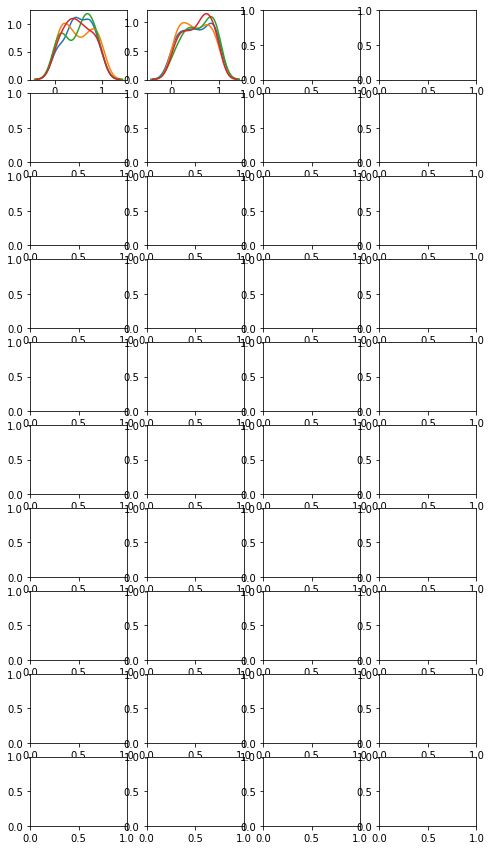

In [173]:
reward_map = np.random.rand(q_nrow*q_ncol, 64, 4)

fig, ax = plt.subplots(nrow, ncol, figsize=(8, 15))
sns.distplot(reward_map[0, :, 0], ax=ax[0, 0], hist=False)
sns.distplot(reward_map[0, :, 1], ax=ax[0, 0], hist=False)
sns.distplot(reward_map[0, :, 2], ax=ax[0, 0], hist=False)
sns.distplot(reward_map[0, :, 3], ax=ax[0, 0], hist=False)

sns.distplot(reward_map[1, :, 0], ax=ax[0, 1], hist=False)
sns.distplot(reward_map[1, :, 1], ax=ax[0, 1], hist=False)
sns.distplot(reward_map[1, :, 2], ax=ax[0, 1], hist=False)
sns.distplot(reward_map[1, :, 3], ax=ax[0, 1], hist=False)

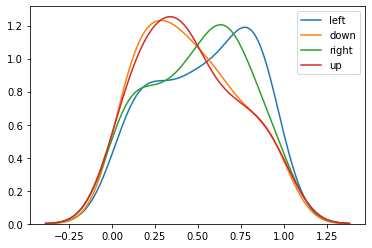

In [36]:
sns.distplot(reward_map[0, :, 0], hist=False, label='left')
sns.distplot(reward_map[0, :, 1], hist=False, label='down')
sns.distplot(reward_map[0, :, 2], hist=False, label='right')
sns.distplot(reward_map[0, :, 3], hist=False, label='up')

In [12]:
reward_map.shape

(30, 64, 12)

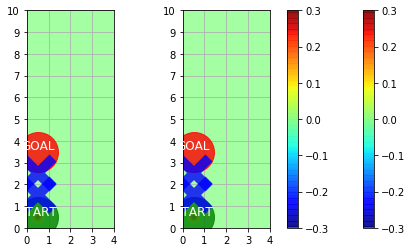

In [5]:
# fig = plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(8,4))
mappable0 = ax[0].imshow(reward_map, cmap=cm.jet, interpolation="bilinear",
           vmax=abs(reward_map).max(), vmin=-abs(reward_map).max(), alpha=0.7)
ax[0].set_xlim(-0.5, q_ncol - 0.5)
ax[0].set_ylim(-0.5, q_nrow - 0.5)
ax[0].set_xticks(np.arange(-0.5, q_ncol, state_size))
ax[0].set_yticks(np.arange(-0.5, q_nrow, state_size))
ax[0].set_xticklabels(range(ncol + 1))
ax[0].set_yticklabels(range(nrow + 1))
ax[0].grid(which="both")


# Snp.random.choice([0,1,2,3], size=1, p=prob_n)tart: green, Goal: blue, Hole: red
ax[0].plot([1], [1], marker="o", color='g', markersize=40, alpha=0.8)
ax[0].plot([1], [10], marker="o", color='r', markersize=40, alpha=0.8)
ax[0].plot([1], [4], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)
ax[0].plot([1], [7], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)
fig.colorbar(mappable0, ax=ax, orientation="vertical")

ax[0].text(1, 1.3, 'START', ha='center', size=12, c='w')
ax[0].text(1, 10.3, 'GOAL', ha='center', size=12, c='w')


mappable0 = ax[1].imshow(reward_map, cmap=cm.jet, interpolation="bilinear",
           vmax=abs(reward_map).max(), vmin=-abs(reward_map).max(), alpha=0.7)
ax[1].set_xlim(-0.5, q_ncol - 0.5)
ax[1].set_ylim(-0.5, q_nrow - 0.5)
ax[1].set_xticks(np.arange(-0.5, q_ncol, state_size))
ax[1].set_yticks(np.arange(-0.5, q_nrow, state_size))
ax[1].set_xticklabels(range(ncol + 1))
ax[1].set_yticklabels(range(nrow + 1))
ax[1].grid(which="both")
fig.colorbar(mappable0, ax=ax, orientation="vertical")


# Snp.random.choice([0,1,2,3], size=1, p=prob_n)tart: green, Goal: blue, Hole: red
ax[1].plot([1], [1], marker="o", color='g', markersize=40, alpha=0.8)
ax[1].plot([1], [10], marker="o", color='r', markersize=40, alpha=0.8)
ax[1].plot([1], [4], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)
ax[1].plot([1], [7], marker="x", color='b', markersize=30, markeredgewidth=10, alpha=0.8)

ax[1].text(1, 1.3, 'START', ha='center', size=12, c='w')
ax[1].text(1, 10.3, 'GOAL', ha='center', size=12, c='w')


plt.show()